## Foreign Currency Exchange Price Prediction Using LSTM and GRU models

The primary reason for this project is to practice and use RNNs for various tasks and applications. This analysis will be using CAD/CNY exchange currency rate as dataset. RNNs have truly changed the way sequential data is forecasted.

In [1]:
# import the libraries
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\Elvis\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
# Get the stock code
df = pdr.DataReader('CADCNY=X', data_source='yahoo', start='2004-01-01', end='today')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-01-01,6.22620,6.14870,6.14870,6.16490,0.0,6.16490
2004-01-02,6.42070,6.15900,6.16560,6.40320,0.0,6.40320
2004-01-05,6.46480,6.38020,6.39790,6.44510,0.0,6.44510
2004-01-06,6.46590,6.42310,6.44470,6.44630,0.0,6.44630
2004-01-07,6.44840,6.39560,6.44730,6.42100,0.0,6.42100
...,...,...,...,...,...,...
2020-06-28,5.17929,5.11830,5.16639,5.16607,0.0,5.16607
2020-06-29,5.19098,5.14158,5.17824,5.17864,0.0,5.17864
2020-06-30,5.20962,5.17309,5.19900,5.19859,0.0,5.19859


In [3]:
# Get the number of rows and columns in the data set
df.shape

(4260, 6)

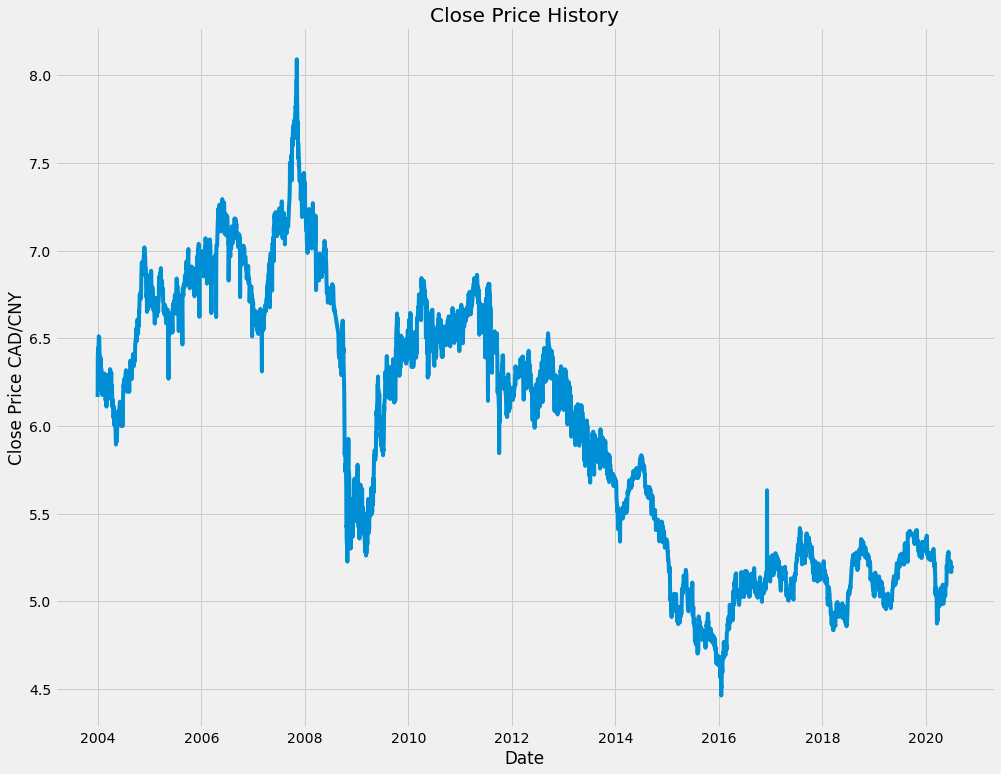

In [4]:
# Visualze tth closing price history
plt.figure(figsize=(15,12))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price CAD/CNY')
plt.show()

In [5]:
# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Converting the dataframe to a numpy array
dataset = data.values
# Get/Compute the number of rows to train the model on
training_data_len = math.ceil(len(dataset) *.8) 

In [6]:
training_data_len

3408

In [7]:
# Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [8]:
scaled_data

array([[0.46916163],
       [0.53483444],
       [0.54638151],
       ...,
       [0.20285779],
       [0.20235633],
       [0.20353298]])

In [9]:
# Split the data into x_train and y_train data sets
train_data = scaled_data[0:training_data_len]
x_train = []
y_train = []

# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
time_steps = 60
for i in range(len(train_data) - time_steps):
    x_train.append(train_data[i:i + time_steps])
    y_train.append(train_data[i + time_steps])

# Convert x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

In [10]:
# The LSTM input layer must be 3D. 
# The meaning of the 3 input dimensions are: samples, time steps, and features. 

print(x_train.shape)
print(y_train.shape)

(3348, 60, 1)
(3348, 1)


### LSTM Model

Long short-term memory (LSTM) units (or blocks) are a building unit for layers of a recurrent neural network (RNN). A RNN composed of LSTM units is often called an LSTM network. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell is responsible for "remembering" values over arbitrary time intervals; hence the word "memory" in LSTM. Each of the three gates can be thought of as a "conventional" artificial neuron, as in a multi-layer (or feedforward) neural network: that is, they compute an activation (using an activation function) of a weighted sum. Intuitively, they can be thought as regulators of the flow of values that goes through the connections of the LSTM; hence the denotation "gate". There are connections between these gates and the cell.

The expression long short-term refers to the fact that LSTM is a model for the short-term memory which can last for a long period of time. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events. LSTMs were developed to deal with the exploding and vanishing gradient problem when training traditional RNNs.

Source: Wikipedia

In [14]:
#Build the LSTM network model
model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))

# output layer
model.add(Dense(units=1))

In [15]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
#Train the model
#Batch size is the total number of training examples present in a single batch
#Epoch is the number of iterations when an entire data set is passed forward and backward through the neural network
history = model.fit(x_train, y_train, batch_size=100, epochs=30, validation_split=0.1)

Train on 3013 samples, validate on 335 samples
Epoch 1/30
3013/3013 [==============================] - 3s 982us/step - loss: 0.0359 - val_loss: 0.0112
Epoch 2/30
3013/3013 [==============================] - 2s 737us/step - loss: 0.0027 - val_loss: 0.0015
Epoch 3/30
3013/3013 [==============================] - 2s 788us/step - loss: 0.0010 - val_loss: 3.7747e-04
Epoch 4/30
3013/3013 [==============================] - 2s 747us/step - loss: 8.1295e-04 - val_loss: 5.7261e-04
Epoch 5/30
3013/3013 [==============================] - 2s 719us/step - loss: 7.9213e-04 - val_loss: 3.9211e-04
Epoch 6/30
3013/3013 [==============================] - 2s 681us/step - loss: 7.6162e-04 - val_loss: 3.9622e-04
Epoch 7/30
3013/3013 [==============================] - 2s 665us/step - loss: 7.5315e-04 - val_loss: 3.5360e-04
Epoch 8/30
3013/3013 [==============================] - 2s 659us/step - loss: 7.5338e-04 - val_loss: 3.9525e-04
Epoch 9/30
3013/3013 [==============================] - 2s 666us/step - loss:

In [17]:
#Split the data into x_test and y_test data sets
test_data = scaled_data[training_data_len - time_steps:len(dataset)]
x_test = []
y_test = dataset[training_data_len:]
for i in range(len(test_data) - time_steps):
    x_test.append(test_data[i:i + time_steps])
#Convert x_test and y_test to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

In [18]:
# check the shape
print(test_data.shape)
print(x_test.shape)
print(y_test.shape)

(912, 1)
(852, 60, 1)
(852, 1)


In [19]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [20]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

0.04532570338173741

In [21]:
from sklearn.metrics import mean_squared_error
mean_error_lstm = mean_squared_error(predictions, y_test)
mean_error_lstm

0.002054419387049242

C:\Users\Elvis\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


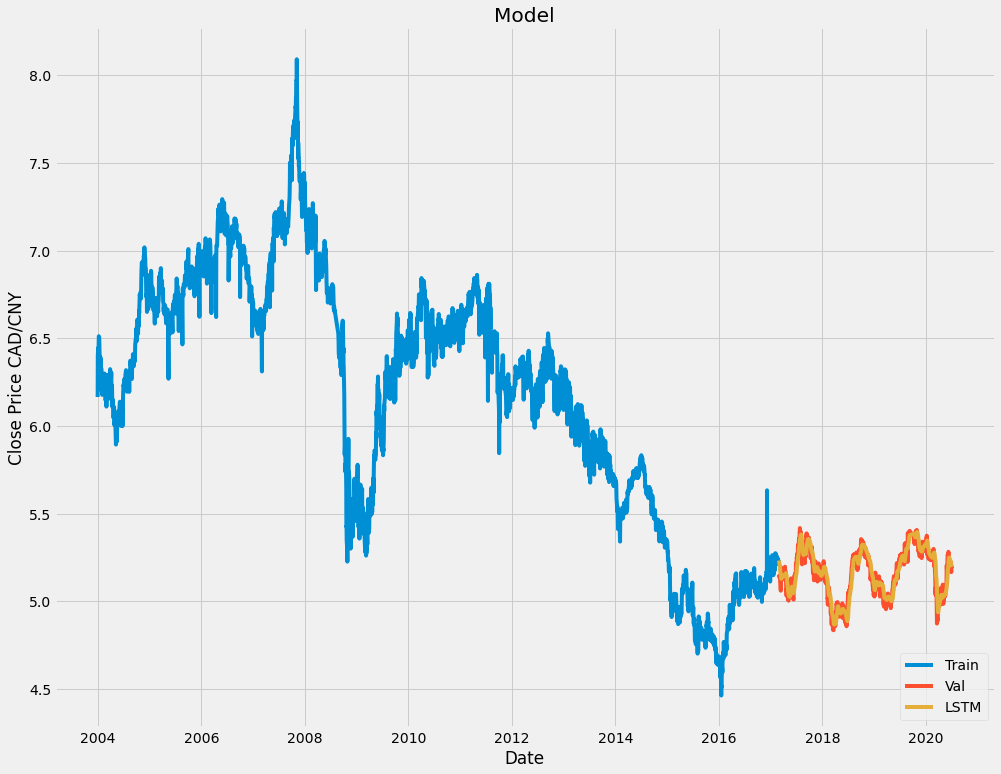

In [22]:
#Plot/Create the data for the graph
train = data[0:training_data_len]
valid = data[training_data_len:]
valid['LSTM Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(15,12))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price CAD/CNY')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'LSTM Predictions']])
plt.legend(['Train', 'Val', 'LSTM'], loc='lower right')
plt.show()

In [27]:
#Show the valid and predicted prices for last 5 days
valid.tail()

,Close,LSTM Predictions
Date,,
2020-06-28,5.16607,5.213482
2020-06-29,5.17864,5.207264
2020-06-30,5.19859,5.201585
2020-07-01,5.19677,5.197943
2020-07-02,5.20104,5.195654


In [28]:
# LSTM Prediction
#Get the quote
CAD_quote = pdr.DataReader('CADCNY=X', data_source='yahoo', start='2018-01-01', end='2020-07-01')
#Create a new dataframe
new_df = CAD_quote.filter(['Close'])
#Get the last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[5.195654]]


In [29]:
#Get the quote
CAD_quote2 = pdr.DataReader('CADCNY=X', data_source='yahoo', start='2020-06-25', end='today')
print(CAD_quote2['Close'])

Date
2020-06-24    5.18159
2020-06-25    5.18541
2020-06-28    5.16607
2020-06-29    5.17864
2020-06-30    5.19859
2020-07-01    5.19677
2020-07-02    5.20104
Name: Close, dtype: float64


### GRU Model

The GRU is like a long short-term memory (LSTM) with a forget gate but has fewer parameters than LSTM, as it lacks an output gate.GRU's performance on certain tasks of polyphonic music modeling, speech signal modeling and natural language processing was found to be similar to that of LSTM. GRUs have been shown to exhibit even better performance on certain smaller and less frequent datasets.

Source: Wikipedia

In [30]:
#Build the GRU network model
model_gru = Sequential()

# First GRU layer
model_gru.add(GRU(units=50, return_sequences=True,input_shape=(x_train.shape[1],1),activation='tanh'))

# Second GRU layer
model_gru.add(GRU(units=50, return_sequences=False,activation='tanh'))

# Output layer
model_gru.add(Dense(units=1))

#Compile the model
model_gru.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
#Train the model
model_gru.fit(x_train, y_train, batch_size=100, epochs=30, validation_split=0.1)

Train on 3013 samples, validate on 335 samples
Epoch 1/30
3013/3013 [==============================] - 3s 927us/step - loss: 0.0554 - val_loss: 0.0036
Epoch 2/30
3013/3013 [==============================] - 2s 700us/step - loss: 0.0030 - val_loss: 0.0041
Epoch 3/30
3013/3013 [==============================] - 2s 696us/step - loss: 0.0011 - val_loss: 0.0019
Epoch 4/30
3013/3013 [==============================] - 2s 684us/step - loss: 5.6877e-04 - val_loss: 5.0292e-04
Epoch 5/30
3013/3013 [==============================] - 2s 688us/step - loss: 3.8698e-04 - val_loss: 1.9129e-04
Epoch 6/30
3013/3013 [==============================] - 2s 703us/step - loss: 3.4552e-04 - val_loss: 1.7316e-04
Epoch 7/30
3013/3013 [==============================] - 2s 745us/step - loss: 3.3686e-04 - val_loss: 1.7197e-04
Epoch 8/30
3013/3013 [==============================] - 2s 704us/step - loss: 3.3253e-04 - val_loss: 1.7459e-04
Epoch 9/30
3013/3013 [==============================] - 2s 695us/step - loss: 3.2

In [32]:
#Getting the models predicted price values
predictions_gru = model_gru.predict(x_test) 
predictions_gru = scaler.inverse_transform(predictions_gru)#Undo scaling

In [33]:
#Calculate/Get the value of RMSE
rmse_gru=np.sqrt(np.mean(((predictions_gru - y_test)**2)))
rmse_gru

0.03103793826714904

In [34]:
mean_error_gru = mean_squared_error(predictions_gru, y_test)
mean_error_gru

0.0009633536118753547

C:\Users\Elvis\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


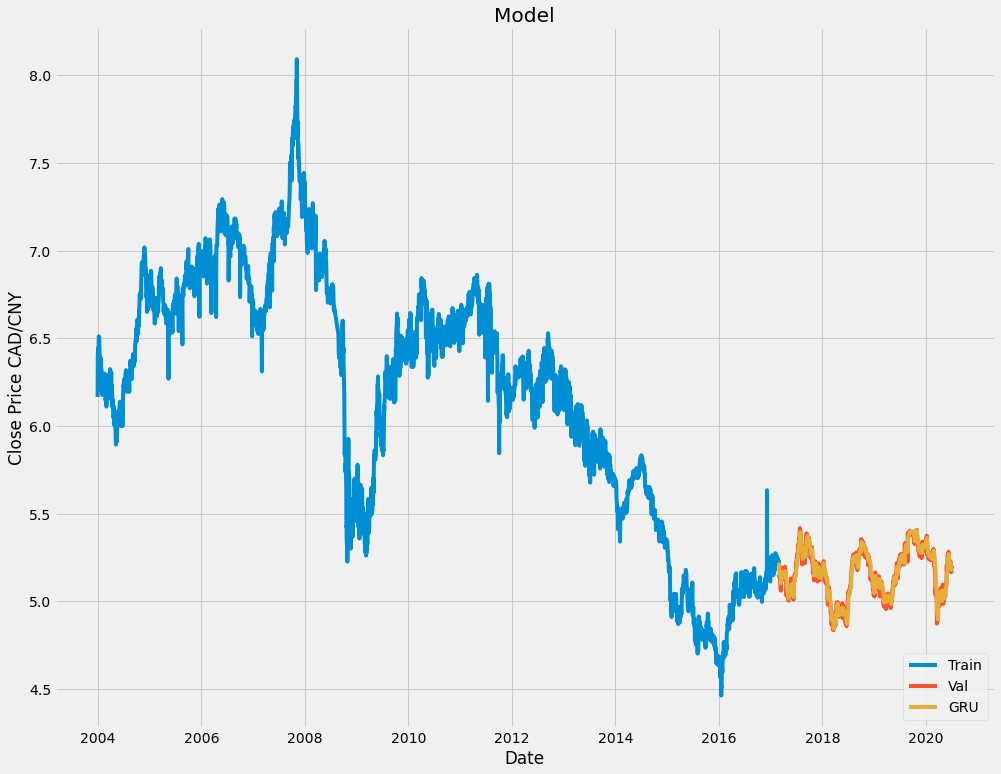

In [35]:
#Plot/Create the data for the graph
train_gru = data[0:training_data_len]
valid_gru = data[training_data_len:]
valid_gru['GRU Predictions'] = predictions_gru
#Visualize the data
plt.figure(figsize=(15,12))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price CAD/CNY')
plt.plot(train_gru['Close'])
plt.plot(valid_gru[['Close', 'GRU Predictions']])
plt.legend(['Train', 'Val', 'GRU'], loc='lower right')
plt.show()

In [36]:
#Show the valid and predicted prices for last 5 days
valid_gru.tail()

,Close,GRU Predictions
Date,,
2020-06-28,5.16607,5.194694
2020-06-29,5.17864,5.184359
2020-06-30,5.19859,5.180911
2020-07-01,5.19677,5.186503
2020-07-02,5.20104,5.191369


In [37]:
# GRU Prediction
#Get the quote
CAD_quote_gru = pdr.DataReader('CADCNY=X', data_source='yahoo', start='2018-01-01', end='2020-07-01')
#Create a new dataframe
new_df_gru = CAD_quote.filter(['Close'])
#Get the last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model_gru.predict(X_test)
#undo the scaling 
pred_price_gru = scaler.inverse_transform(pred_price)
print(pred_price_gru)

[[5.1913686]]


In [38]:
#Get the quote
CAD_quote2 = pdr.DataReader('CADCNY=X', data_source='yahoo', start='2020-06-11', end='today')
print(CAD_quote2['Close'])

Date
2020-06-10    5.25394
2020-06-11    5.17555
2020-06-14    5.18934
2020-06-15    5.23086
2020-06-16    5.22859
2020-06-17    5.21291
2020-06-18    5.20919
2020-06-21    5.18626
2020-06-22    5.22810
2020-06-23    5.20417
2020-06-24    5.18159
2020-06-25    5.18541
2020-06-28    5.16607
2020-06-29    5.17864
2020-06-30    5.19859
2020-07-01    5.19677
2020-07-02    5.20104
Name: Close, dtype: float64


### Simple Moving Average (SMA)

A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.

A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.
The SMA is a technical indicator that can aid in determining if an asset price will continue or reverse a bull or bear trend.
The SMA can be enhanced as an exponential moving average (EMA) that more heavily weights recent price action.

Source: Wikipedia

In [41]:
import pandas_datareader as pdr
cad_cny = pdr.get_data_yahoo('CADCNY=X', start='2004-01-01', end='today', interval='d')

# initialize short and long windows
short_window = 60
long_window = 120

# initialize 'sma' DataFrame with 'sma_short_above' column
sma = pd.DataFrame(index=cad_cny.index)

# create short simple moving average over short window
sma['sma_short'] = cad_cny['Adj Close'].rolling(window=short_window, min_periods=1).mean()

# create long simple moving average over short window
sma['sma_long'] = cad_cny['Adj Close'].rolling(window=long_window, min_periods=1).mean()

In [46]:
# check the calculated results
sma.iloc[100:110,:]

,sma_short,sma_long
Date,,
2004-05-19,6.137992,6.204853
2004-05-20,6.135483,6.202991
2004-05-23,6.132933,6.201189
2004-05-24,6.130743,6.199481
2004-05-25,6.129320,6.197818
2004-05-26,6.127240,6.196760
2004-05-27,6.123825,6.195509
2004-05-30,6.120992,6.194356
2004-05-31,6.116595,6.192828


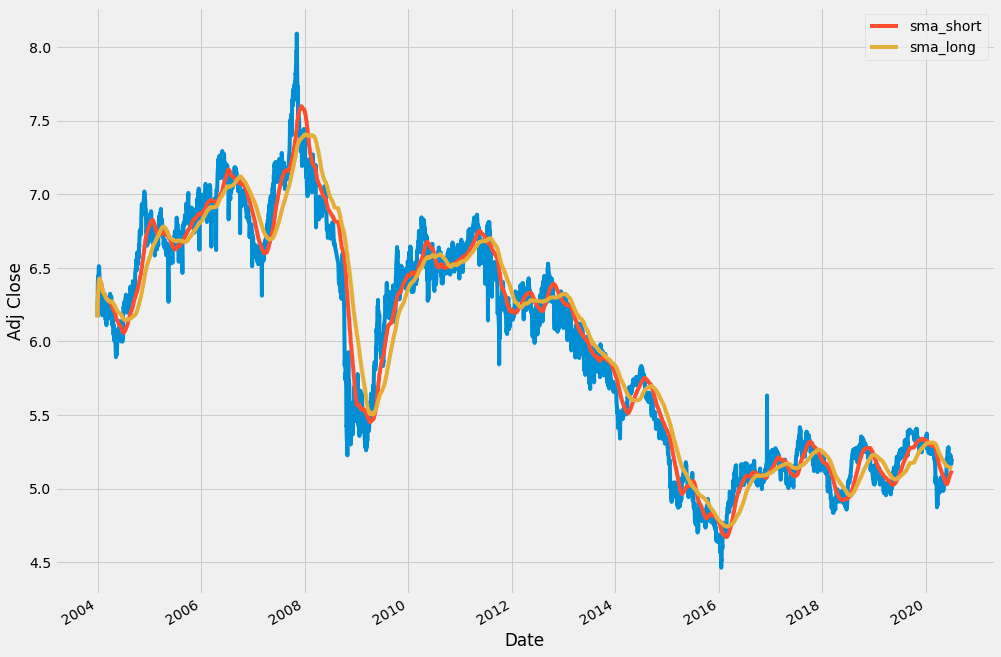

In [49]:
import seaborn as sns
# initialize plot figure
fig = plt.figure(figsize=(15,12))

# add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel='Close Price CAD/CNY')

# plot closing price
sns.lineplot(x=cad_cny.index, y='Adj Close', data=cad_cny);

# plot short and long moving averages
sma[['sma_short', 'sma_long']].plot(ax=ax1)

# show the plot
plt.show()

This is only for showing the trend.